- Nicolas Segura  - 201716989
- David Ruiz Villota - 201620095
- Jaime Torres - 

## 1. Importación de librerías 

En las siguientes líneas de código se importan las librerías y herramientas necesarias para desarrollar el caso de uso.

In [1]:
# Declaración de la semilla
seed = 161
# Librerías para manejo de datos
import pandas as pd
pd.set_option('display.max_columns', 25) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar

import numpy as np
np.random.seed(seed)


# Para preparar los datos
# ------------------------
from sklearn import tree as tr
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
# Para crear el arbol de decisión 
from sklearn.tree import DecisionTreeClassifier 
# Para usar KNN como clasificador
from sklearn.neighbors import KNeighborsClassifier
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para evaluar el modelo
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix , ConfusionMatrixDisplay
# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


#Librerías para la visualización
# -------------------------
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns 



## 2. Carga de los datos
A través de la librería **pandas** podemos realizar la carga de datos desde diferentes fuentes de información, en este caso se realizará la carga de un archivo plano csv (archivo separado por comas).

In [35]:
# Se cargan los datos. 
diagnostics=pd.read_csv('./datos/Datos_Clasificacion_2022.csv', sep=';', encoding = 'utf-8', dtype="unicode")

In [36]:
# Cantidad de datos y número de variables
diagnostics.shape

(100000, 27)

In [37]:
# Mostrar los datos
diagnostics.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,0,1,1,1,40,1,0,0,0,0,1,0,...,18,15,1,0,9,4,3,NaN,NaN,NaN,NaN,NaN
1,0,0,0,0,25,1,0,0,1,0,0,0,...,0,0,0,0,7,6,1,NaN,NaN,NaN,NaN,NaN
2,0,1,1,1,28,0,0,0,0,1,0,0,...,30,30,1,0,9,4,8,NaN,NaN,NaN,NaN,NaN
3,0,1,0,1,27,0,0,0,1,1,1,0,...,0,0,0,0,11,3,6,NaN,NaN,NaN,NaN,NaN
4,0,1,1,1,24,0,0,0,1,1,1,0,...,3,0,0,0,11,5,4,NaN,NaN,NaN,NaN,NaN


In [38]:
# Podemos ver los tipos de todas la variables.
diagnostics.dtypes

Diabetes_012            object
HighBP                  object
HighChol                object
CholCheck               object
BMI                     object
Smoker                  object
Stroke                  object
HeartDiseaseorAttack    object
PhysActivity            object
Fruits                  object
Veggies                 object
HvyAlcoholConsump       object
AnyHealthcare           object
NoDocbcCost             object
GenHlth                 object
MentHlth                object
PhysHlth                object
DiffWalk                object
Sex                     object
Age                     object
Education               object
Income                  object
Unnamed: 22             object
Unnamed: 23             object
Unnamed: 24             object
Unnamed: 25             object
Unnamed: 26             object
dtype: object

In [39]:
# Y hacer una descripción de los datos
diagnostics.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
count,99984,99982,99991,99984,99981,99979,99987,99987,99985,99976,99989,99988,...,99986,99978,99987,99991,99988,99981,99999,0,0,0,0,0
unique,6,5,5,5,95,5,5,5,5,5,5,5,...,49,54,5,5,16,9,11,0,0,0,0,0
top,0,0,0,1,27,0,0,0,1,1,1,0,...,0,0,0,0,9,6,8,NaN,NaN,NaN,NaN,NaN
freq,84078,56544,56814,96330,9624,55426,95818,90617,76135,63639,81464,94248,...,68495,62518,83320,56163,13114,43815,36920,NaN,NaN,NaN,NaN,NaN


In [41]:

# Veamos cuantas ausencias hay para todas las variables:
diagnostics.isna().sum(axis = 0)

Diabetes_012                16
HighBP                      18
HighChol                     9
CholCheck                   16
BMI                         19
Smoker                      21
Stroke                      13
HeartDiseaseorAttack        13
PhysActivity                15
Fruits                      24
Veggies                     11
HvyAlcoholConsump           12
AnyHealthcare               16
NoDocbcCost                 22
GenHlth                     18
MentHlth                    14
PhysHlth                    22
DiffWalk                    13
Sex                          9
Age                         12
Education                   19
Income                       1
Unnamed: 22             100000
Unnamed: 23             100000
Unnamed: 24             100000
Unnamed: 25             100000
Unnamed: 26             100000
dtype: int64

## 3. Limpieza y preparación de los datos

Primero vamos a ejecutar los pasos de limpieza de los datos, relacionados el tratamiento de ausencias y registros duplicados.

In [59]:
# Es recomendable que todos los pasos de limpieza y preparación se realicen sobre otro archivo.
diagnostics_t = diagnostics.copy()
# Primero eliminaremos aquellas columnas cuyas variables no brindan información relevante para el análisis. En este caso el color de cabello y la ciudad.
diagnostics_t = diagnostics_t.drop(['CholCheck', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Education', 'Income', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26'], axis=1)

In [98]:
# Eliminación registros con ausencias, en este caso se eliminaron los registros que registraban 0 en Insulin, BMI, Glucose o SkinThickness
indices = diagnostics_t[(diagnostics_t['BMI'] == 0) | (diagnostics_t['Age'] == 0) ].index
diagnostics_t.replace('-', np.nan, inplace=True)
diagnostics_t.drop(indices, inplace=True)
diagnostics_t.dropna(axis=0, inplace=True)

In [100]:
# Podemos ver los tipos de todas la variables.
diagnostics.dtypes

Diabetes_012            object
HighBP                  object
HighChol                object
CholCheck               object
BMI                     object
Smoker                  object
Stroke                  object
HeartDiseaseorAttack    object
PhysActivity            object
Fruits                  object
Veggies                 object
HvyAlcoholConsump       object
AnyHealthcare           object
NoDocbcCost             object
GenHlth                 object
MentHlth                object
PhysHlth                object
DiffWalk                object
Sex                     object
Age                     object
Education               object
Income                  object
Unnamed: 22             object
Unnamed: 23             object
Unnamed: 24             object
Unnamed: 25             object
Unnamed: 26             object
dtype: object

In [99]:
#Muestra una descripción de los datos
diagnostics_t.describe()

,Diabetes_012,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,Age
count,99635,99635,99635,99635,99635,99635,99635,99635,99635,99635,99635,99635
unique,5,4,4,93,4,4,4,4,4,4,4,15
top,0,0,0,27,0,0,0,1,1,1,0,9
freq,83801,56364,56617,9593,55262,95495,90316,75886,63431,81194,93932,13068


In [94]:
# Cantidad de datos y número de variables
diagnostics_t.shape

(99635, 12)

In [67]:
# Mostrar los datos
diagnostics_t.head()

,Diabetes_012,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,Age
0,0,1,1,40,1,0,0,0,0,1,0,9
1,0,0,0,25,1,0,0,1,0,0,0,7
2,0,1,1,28,0,0,0,0,1,0,0,9
3,0,1,0,27,0,0,0,1,1,1,0,11
4,0,1,1,24,0,0,0,1,1,1,0,11


In [58]:
# Podemos ver los estadísticos de la variable "Outcome"
pd.value_counts(diagnostics_t['Outcome'])

KeyError: 'Outcome'

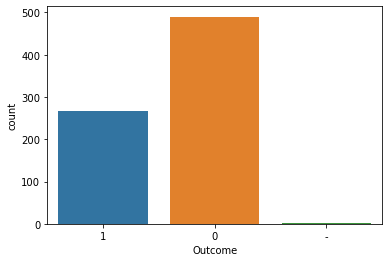

In [24]:
#Se muestra una gráfica de la cantidad de personas que tiene y no tienen diabetes
ax = sns.countplot(x='Outcome', data=diagnostics_t)

Ya que scikit-learn requiere que tanto los atributos como la variable objetivo sean numéricos, transformaremos los datos para que cumplan con dicha condición.

In [25]:
# Vamos a seleccionar de nuestro conjunto solo los atributos numéricos.
number_cols = diagnostics_t.dtypes[(diagnostics_t.dtypes == np.int64) | (diagnostics_t.dtypes == np.float64)].index 
number_cols = diagnostics_t.select_dtypes(include = ['int64','float']).columns
number_cols

Index(['BMI', 'Age'], dtype='object')

In [26]:
diagnostics_m = diagnostics_t[number_cols]

In [27]:
# Podemos ver como quedaron los datos
diagnostics_m.head()

,BMI,Age
0,336,50
1,266,31
2,233,32
3,281,21
4,431,33


In [28]:
# Revisión del total de registros después de la limpieza
diagnostics_m.shape

(757, 2)

## 4. Construcción del modelo

Los algoritmos supervisados implementados en scikit-learn requieren que las variables de entrada estén separadas de la variable objetivo. Adicionalmente debemos normalizar los datos. Esto con el fin de que las distancias sean equiparables.

In [29]:
#Se realiza la tarea de estandarización
scaler = StandardScaler()
#Tomamos los datos de entrenamiento como argumentos
normalized_diag = scaler.fit_transform(diagnostics_m)
normalized_diag = pd.DataFrame(data=diagnostics_m,columns=diagnostics_m.columns)


In [30]:
# Se selecciona la variable objetivo, en este caso "Outcome".
Y = normalized_diag['Outcome']
# Del conjunto de datos se elimina la variable "Outcome"
X = normalized_diag.drop(['Outcome'], axis=1)

KeyError: 'Outcome'

In [ ]:
# Dividir los datos en entrenamiento y test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=seed)

#### 4.1  KNN: Nicolas Segura

In [31]:
#Por medio de k-fold Cross-Validation se determinan los hiperparámetros. Para este caso se determinó que la mejor opción es utilizar minkowski con 5 vecinos y p = 2 (Distancia Euclidiana) 
particiones_knn=KFold(n_splits=10,shuffle=True,random_state=seed)
param_grid_knn = {'n_neighbors': [2,3,5,7,9,11],'metric': ['minkowski','euclidean','manhattan'], 'p': [1,2]}

In [32]:
neigh = KNeighborsClassifier()
#La siguiente función ermite evaluar y seleccionar de forma sistemática los parámetros de un modelo.
mejor_modelok = GridSearchCV(neigh, param_grid_knn, cv=particiones_knn)
#Tomamos los datos de entrenamiento como argumentos
mejor_modelok.fit(X_train, Y_train)

NameError: name 'X_train' is not defined

In [197]:
#Obtenemos los mejores hiperparámetros
mejor_modelok.best_params_

{'metric': 'minkowski', 'n_neighbors': 5, 'p': 2}

In [198]:
neigh_f = mejor_modelok.best_estimator_

In [199]:
#Nos permite predecir las etiquetas de los valores de los datos sobre la base del modelo entrenado.
y_pred = neigh_f.predict(X_test)

In [200]:
# Se genera la matriz de confusión
confusion_matrix(Y_test, y_pred)

array([[35, 17],
       [10, 17]], dtype=int64)

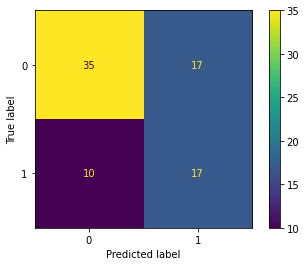

In [201]:
# Se puede visualizar la matriz de confusión
plot_confusion_matrix(neigh_f, X_test, Y_test)  
plt.show()

In [202]:
# Mostrar reporte de clasificación
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.67      0.72        52
           1       0.50      0.63      0.56        27

    accuracy                           0.66        79
   macro avg       0.64      0.65      0.64        79
weighted avg       0.68      0.66      0.67        79



### 4.2 Árbol de decisión: Nicolás Segura

In [203]:
#Por medio de k-fold Cross-Validation se determinan los hiperparámetros. Para este caso se determinó que la mejor opción es utilizar gini con profundidad de 4 y  un mínimo de muestras por split de 5.
#Gini nos permite medir la probabilidad de no sacar dos registros de la misma clase del nodo. 
particiones_t = KFold(n_splits=10, shuffle=True, random_state=seed)
param_grid = {'criterion': ['gini', 'entropy'],'max_depth': [4,6,8,10,20], 'min_samples_split': [2,3,5,10,15]}

In [204]:
#La función mide la calidad de una división.
tree = DecisionTreeClassifier(random_state=seed)
#Ayuda a recorrer hiperparámetros predefinidos en su conjunto de entrenamiento.
mejor_modelo = GridSearchCV(tree, param_grid, cv=particiones_t)
#Tomamos los datos de entrenamiento como argumentos
mejor_modelo.fit(X_train, Y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=161, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=161),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 20],
                         'min_samples_split': [2, 3, 5, 10, 15]})

In [205]:
mejor_modelo.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 5}

In [206]:
# Crear el objeto de arbol de decisión. 
f_tree=mejor_modelo.best_estimator_

Para determinar el rendimiento del modelo podemos en primer lugar, generar la matriz de confusión.

In [207]:
# Determinamos las predicciones del modelo sobre el conjunto test.
y_pred = f_tree.predict(X_test)

In [208]:
# Se genera la matriz de confusión
confusion_matrix(Y_test, y_pred)

array([[46,  6],
       [11, 16]], dtype=int64)

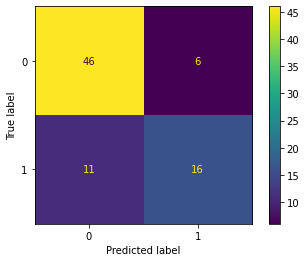

In [209]:
# Se puede visualizar la matriz de confusión
plot_confusion_matrix(f_tree, X_test, Y_test)  
plt.show()  

In [210]:
#Imprimimos los indicadores de exactitud, recall, precisión y puntuación F1 para evaluar 
print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred))
print("Recall: {}".format(recall_score(Y_test,y_pred)))
print("Precisión: {}".format(precision_score(Y_test,y_pred)))
print("Puntuación F1: {}".format(f1_score(Y_test,y_pred)))

Exactitud: 0.78
Recall: 0.5925925925925926
Precisión: 0.7272727272727273
Puntuación F1: 0.6530612244897959


Para tener una panorama completo podemos generar un reporte.

In [211]:
# Mostrar reporte de clasificación
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        52
           1       0.73      0.59      0.65        27

    accuracy                           0.78        79
   macro avg       0.77      0.74      0.75        79
weighted avg       0.78      0.78      0.78        79

